<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO SEMANAL
#### Autor: RICARDO RELOZ


# EJERCICIO
## Se pide diseñar un filtro pasabanda que cumpla con la siguiente plantilla:

### Aproximacion de Chebyshev con riple de 0,5dB
### w0 [rad/s] : 2pi22KHz
### Q : 5
### |T(fs1)| = -16dB PARA fs1= 17KHz
### |T(fs2)| = -24dB PARA fs2= 36KHz 

<img src="./ejEJERCICIO.png" align="left" width="420" /> 

### Consignas de la actividad:

👉  Obtener la plantilla de diseño pasabanda normalizada

👉  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

👉  Obtener la transferencia pasabanda normalizada

👉  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

👉  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.
    
<img src="./ejCIRCUITO.png" align="left" width="420" /> 

Informe

Respecto al informe, se mantiene el mismo formato usado hasta el momento, informe en jupyter-notebook, simulaciones en python y LTspice. Se mantienen las recomendaciones para la inclusión de gráficas y resultados de la simulación, y se agrega:

+ Cada figura deberá tener una leyenda o un párrafo que haga referencia a ella

+ Al menos una sección donde:

     * se discutan los resultados obtenidos, factibilidad de implementación de la red, componentes sensibles, etc.

     * se informe las dificultades o problemas, si las hubiera

     * se destaquen los aspectos salientes de la resolución propuesta.

## Ejercicio 1
Primero Normalizo las w0 para hacer de 1 Pasabanda a 2 Pasabajos

<img src="./FOTO01.jpg" align="left" width="500" /> 


## Ejercicio 2
Hago ambos filtros para ver cual elegire de los 2 para usar como Prototipo de TRANSFERENCIA

### FILTRO 1
<img src="./FOTO03.jpg" align="left" width="600" /> 
<img src="./FOTO04.jpg" align="left" width="600" /> 

### FILTRO 2
<img src="./FOTO05.jpg" align="left" width="600" /> 
<img src="./FOTO06.jpg" align="left" width="600" /> 

### RESPUESTA: Escojo el filtro 1 porque la n del FILTRO 2, no cumpliria los requisitos del lado que pide el filtro 1

## Ejercicio 3
Una vez escogido el filtro, la paso por el nucleo y la adapto a sus valores nominales
### Los $^3 en rojo, es una vez calculado lo negro, multiplico todo por para reordenar la Transferencia

<img src="./FOTO07.jpg" align="left" width="600" />

### Despues separe en parte para un mejor orden
<img src="./FOTO08.jpg" align="left" width="600" /> 

### Las w0 y Q
<img src="./FOTO09.jpg" align="left" width="600" /> 

## Ejercicio 4
Para poder hacer la Funcion transferencia del circuito prototipo, se tuvo que tomar en cuenta ciertos valores
Para facilitar la escritura de calculos iguale los valores
### C1 = C2
<img src="./FOTO10.jpg" align="left" width="600" /> 
<img src="./FOTO11.jpg" align="left" width="600" /> 
<img src="./FOTO12.jpg" align="left" width="600" /> 
<img src="./FOTO14.jpg" align="left" width="600" /> 

## Ejercicio 5
Una vez obtenido las funciones de transferencia, solo tenia que desnormalizar el circuito
<img src="./FOTO13.jpg" align="left" width="600" /> 
<img src="./FOTO02.jpg" align="left" width="600" /> 
<img src="./CIRCUITO.png" align="left" width="1000" /> 


### Simulacion en SPYDER normalizada

(3,
 <Axes: title={'center': 'Retardo de grupo'}, xlabel='Frecuencia angular [rad/seg]', ylabel='Retardo de grupo [seg]'>)

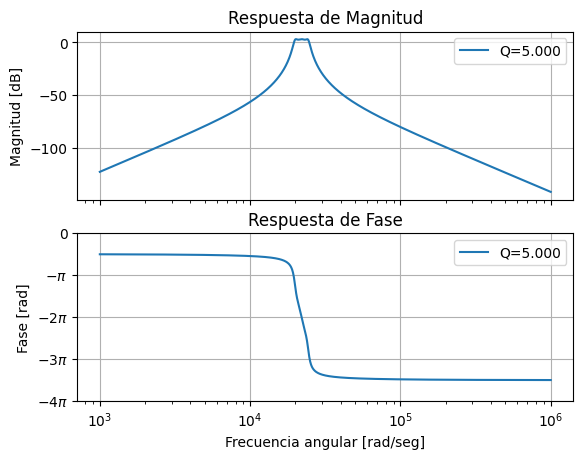

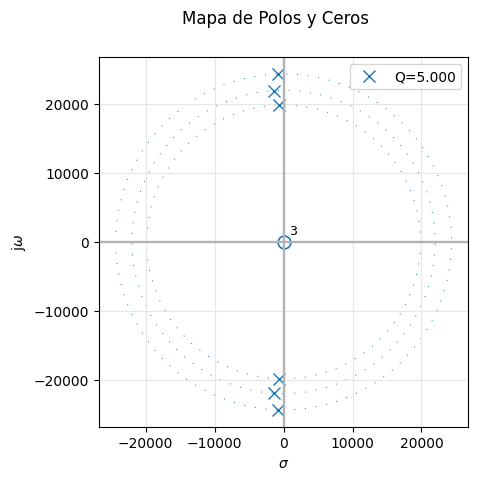

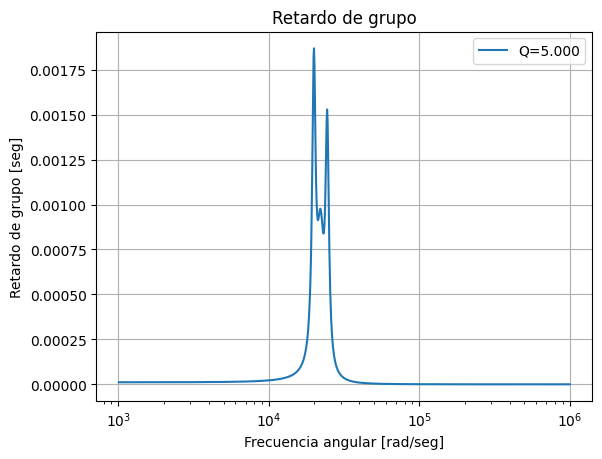

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np


# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

w0 = 22000
qq = 5
K = 1


my_tf = TransferFunction( [K*pow(w0/qq,3) , 0 , 0 , 0] , [1, 1.25*w0/qq , 3*pow(w0,2) + 1.534*pow(w0/qq,2) , 2.5*pow(w0,3)/qq + 0.715*pow(w0/qq , 3) , 3*pow(w0,4)+ 1.534*pow(w0,4)/pow(qq,2) , 1.25*pow(w0,5)/qq , pow(w0,6)])
#my_tf=TransferFunction([0.0057] , [])

plt.close('all')

bodePlot(my_tf, fig_id=1, filter_description = 'Q={:3.3f}'.format(qq) )

pzmap(my_tf, fig_id=2, filter_description = 'Q={:3.3f}'.format(qq)) #S plane pole/zero plot

GroupDelay(my_tf, fig_id=3, filter_description = 'Q={:3.3f}'.format(qq))


## SIMULACION LTSPICE

### Circuito DesNormalizado
<img src="./CIRCUITO.png" align="left" width="900" /> 

### Grafico respuesta en frecuencia del circuito en w0
<img src="./Grafico1.png" align="left" width="900" /> 

### Grafico respuesta en frecuencia del circuito en wp1 wp2
<img src="./Grafico2.png" align="left" width="900" /> 

### Grafico respuesta en frecuencia del circuito en ws1 ws2
<img src="./Grafico3.png" align="left" width="900" /> 

## Conclusiones y Reflexiones
Tras Calcular los valores de las funciones de transferencias, pude comprobar, que mientras mas se acomplejiza el circuito, mas es propenso el error decimal de los valores, es por eso, que se puede ver, que aunque las graficas cumple de una forma visual, no es una aproximacion precisa.